In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
def rnorm(number_of_elements, mean=0, variance_squared=1): # TODO: why there are different results
    return math.sqrt(variance_squared) * np.random.randn(number_of_elements) + mean

## Exercise a) 
Using the rnorm() function, create a vector, x , containing 100 observations drawn from a N (0, 1) distribution. This represents a feature, X.

In [4]:
x_list = rnorm(100)

## Exercise b)
Using the rnorm() function, create a vector, eps , containing 100
observations drawn from a N (0, 0.25) distribution i.e. a normal
distribution with mean zero and variance 0.25.

In [5]:
epsilons = rnorm(100, 0, 0.25)

## Exercise c)
Using x and eps , generate a vector y according to the model
Y = −1 + 0.5X + .
(3.39)
What is the length of the vector y ? What are the values of β 0
and β 1 in this linear model?

In [6]:
y = [-1 + (0.5 * x) + e for x, e in zip(x_list, epsilons)]

What is the length of the vector y?

100

What are the values of $\beta_0$ and $\beta_1$ in this linear model?

-1 and 0.5

## Exercise d)

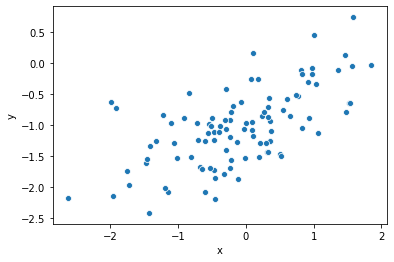

In [7]:
data = {'x': x_list, 'y': y}
df = pd.DataFrame(data)
ax = sns.scatterplot(x="x", y="y", data=df)

## Exercise e)

In [8]:
model = sm.OLS.from_formula('y ~ x', data)
results_x = model.fit()
print(results_x.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     66.47
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.20e-12
Time:                        14:59:19   Log-Likelihood:                -66.393
No. Observations:                 100   AIC:                             136.8
Df Residuals:                      98   BIC:                             142.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9963      0.048    -20.847      0.0

In [9]:
results_x.pvalues

Intercept    8.414791e-38
x            1.195745e-12
dtype: float64

Coefficients (-0.92 and 0.54) are relatively close to the true ones (-1.0 and 0.5).

P-values are very close to 0, with F-statistic being high (107.0) $\rightarrow$ we can reject null hypothesis.

## Exercise f)

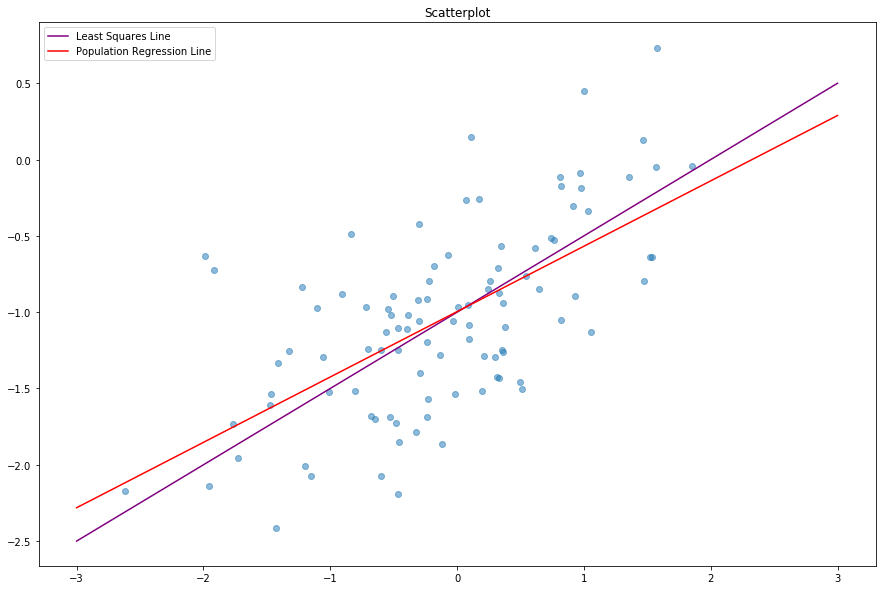

In [10]:
a = results_x.params['x']
b = results_x.params['Intercept']

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x_list, y, alpha=0.5)
x = np.linspace(-3.0, 3.0, 10)

ax.plot(x, eval("0.5 * x - 1"), color='purple', label='Least Squares Line')
ax.plot(x, eval("a * x + b"), color='red', label='Population Regression Line')

ax.set_title('Scatterplot')
plt.legend(loc=2)
plt.show()

## Exercise g)

In [11]:
model = sm.OLS.from_formula('y ~ x + I(x**2)', data)
results_x_squared = model.fit()
print(results_x_squared.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     36.87
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.23e-12
Time:                        14:59:19   Log-Likelihood:                -64.010
No. Observations:                 100   AIC:                             134.0
Df Residuals:                      97   BIC:                             141.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0691      0.058    -18.558      0.0

In [12]:
print(f'R^2 of y ~ x: {results_x.rsquared }')
print(f'R^2 of y ~ x + x^2: {results_x_squared.rsquared }')

R^2 of y ~ x: 0.4041453697707835
R^2 of y ~ x + x^2: 0.43188337621030304


In [13]:
results_x_squared.pvalues

Intercept    1.108132e-33
x            1.535656e-13
I(x ** 2)    3.196614e-02
dtype: float64

There is a slight increase in the value of $R^2$, but p-value for $I(x^2)$ is > 5% - there is no relationship between y and $x^2$.

# Rerun pipeline

In [14]:
def visualise_plots(results, x, y):
    a = results.params['x']
    b = results.params['Intercept']

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(x, y, alpha=0.5)
    x_values = np.linspace(-3, 3, 10)

    ax.plot(x_values, eval("0.5 * x_values - 1"), color='purple', label='Least Squares Line')
    ax.plot(x_values, eval("a * x_values + b"), color='red', label='Population Regression Line')

    ax.set_title('Scatterplot')
    plt.legend(loc=2)
    plt.show()

In [15]:
def perform_pipeline(variance):

    x_list = rnorm(100)
    epsilons = rnorm(100, 0, variance)
    # eps

    y = [-1 + (0.5 * x) + e for x, e in zip(x_list, epsilons)]
    data = {'x': x_list, 'y': y}
    # TODO: visualize
    
    
    model = sm.OLS.from_formula('y ~ x', data)
    results = model.fit()
    print(results.summary())
    
    a = results.params['x']
    b = results.params['Intercept']

    visualise_plots(results, x_list, y)
    print('\n' * 3)

    model = sm.OLS.from_formula('y ~ x + I(x**2)', data)
    results_squared = model.fit()
    print(results_squared.summary())
    return results, results_squared

## Ex h) Less noise

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           3.05e-21
Time:                        14:59:19   Log-Likelihood:                -59.758
No. Observations:                 100   AIC:                             123.5
Df Residuals:                      98   BIC:                             128.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9466      0.045    -21.266      0.0

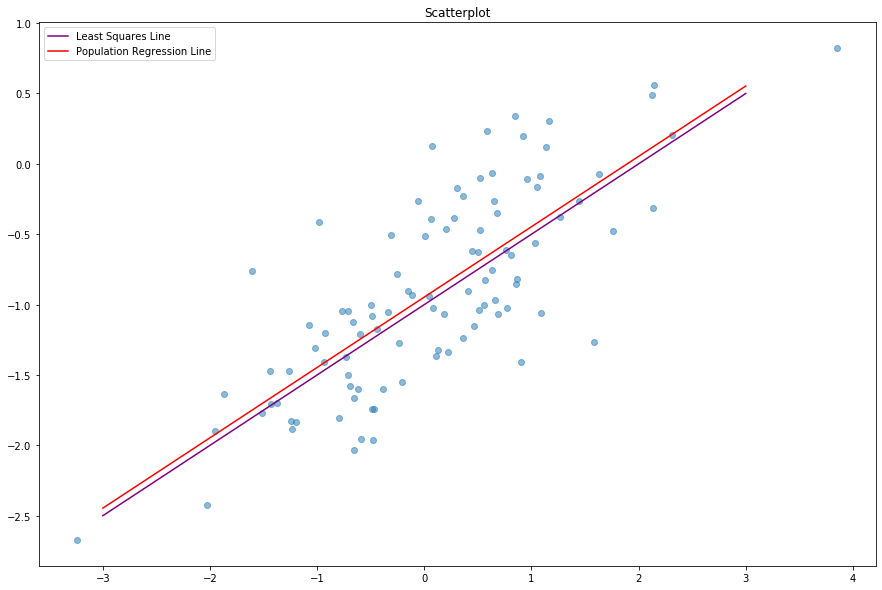





                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     73.11
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           4.34e-20
Time:                        14:59:20   Log-Likelihood:                -59.681
No. Observations:                 100   AIC:                             125.4
Df Residuals:                      97   BIC:                             133.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9367      0.051    -18.203     

In [16]:
results_less_noise, results_less_noise_squared = perform_pipeline(0.25)

## Ex i) More noise

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     23.41
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           4.86e-06
Time:                        14:59:20   Log-Likelihood:                -133.04
No. Observations:                 100   AIC:                             270.1
Df Residuals:                      98   BIC:                             275.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1196      0.093    -12.093      0.0

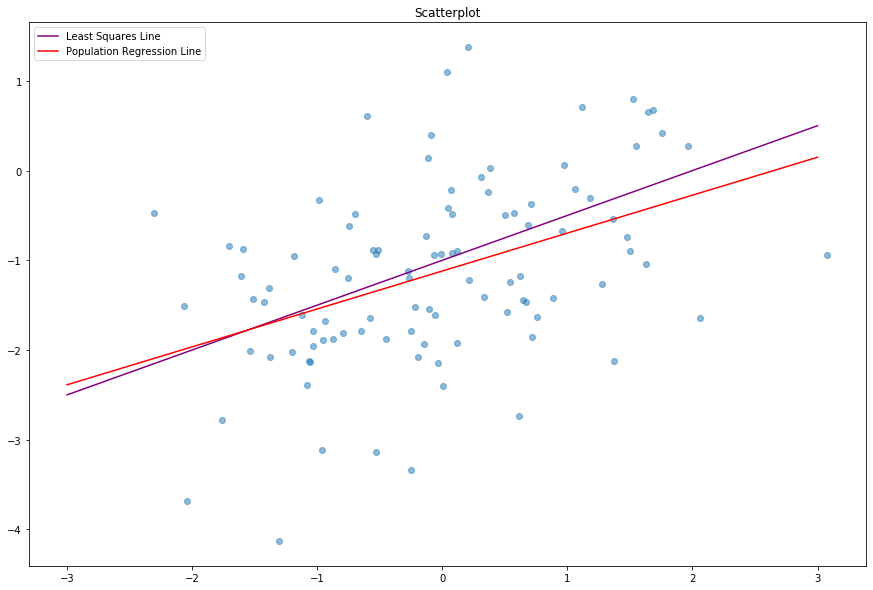





                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     11.69
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           2.82e-05
Time:                        14:59:20   Log-Likelihood:                -132.95
No. Observations:                 100   AIC:                             271.9
Df Residuals:                      97   BIC:                             279.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0894      0.119     -9.187     

In [17]:
results_more_noise, results_more_noise_squared = perform_pipeline(1)

# Confidence intervals

mean +- 1.96 * std / sqrt(count)

In [18]:
def get_confidence_intervals_size(dataframe, variable):
    ci = dataframe.loc[variable]
    return abs(ci[0] - ci[1])

## Initial dataset

In [19]:
ci_initial = results_x.conf_int()
ci_initial

,0,1
Intercept,-1.091125,-0.901447
x,0.324103,0.532640


In [20]:
# results_x_squared.conf_int()

## Less noise dataset

In [21]:
ci_less_noise = results_less_noise.conf_int()
ci_less_noise

,0,1
Intercept,-1.034902,-0.858244
x,0.418168,0.581620


In [22]:
# results_less_noise_squared.conf_int()

## More noise dataset

In [23]:
ci_more_noise = results_more_noise.conf_int()
ci_more_noise

,0,1
Intercept,-1.303366,-0.935904
x,0.249345,0.596046


In [24]:
# results_more_noise_squared.conf_int()

In [25]:
initial_ci_size = get_confidence_intervals_size(ci_initial, 'x')
less_noise_ci_size = get_confidence_intervals_size(ci_less_noise, 'x')
more_noise_ci_size = get_confidence_intervals_size(ci_more_noise, 'x')

In [26]:
print(initial_ci_size)
print(less_noise_ci_size)
print(more_noise_ci_size)

0.20853683693361585
0.16345206554318614
0.3467013818909459


All the intervals are oscillating around $0.5$, the narrowest interval is the second one - the one with less noise.